This file uses "Trimer script.jl" to create the following results:
1. Dispersion of 16-27 subspace - higher excited states.
2. Dispersion of 28-45 subspace - Goldstone modes dispersion for J=0.
3. Goldstone modes along the high symmetry path for J>0. 
4. Fluctuations in the ground state calculations.
5. Magnetization calculations in the ground state to compare to the VMC results.
6. GS energy- plot as function on J (the $\alpha,\beta$ calculations are in "GS_energy_check.ipynb" file).

# Include

In [2]:
include("Trimer script new.jl")

VacuumStateFluctuations (generic function with 1 method)

# Relevant space code

In [3]:
A_dict = CreateA_dict() 
J = 0.4 # Generic value
k = [3.0,4.5] # Generic value
full_anomalous = CreateAnomalousBB(A_dict, J, k) + CreateAnomalousAB(A_dict, J, k)
full_normal = CreateNormalBB(A_dict, J, k) + CreateNormalAB(A_dict, J, k)
rel_space = find_subspace_D(full_anomalous,full_normal)

34-element Vector{Int64}:
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21
 22
 23
  ⋮
 36
 37
 38
 39
 40
 41
 42
 43
 44
 64
 65
 66

# Vacuum state energy as function of $J$

Finding the full relevant subspace

In [94]:
A_dict = CreateA_dict() 
J = 0.4 # Generic value
k = [3.0,4.5] # Generic value
full_anomalous = CreateAnomalousBB(A_dict, J, k) + CreateAnomalousAB(A_dict, J, k)
full_normal = CreateNormalBB(A_dict, J, k) + CreateNormalAB(A_dict, J, k)
rel_space = find_subspace_D(full_anomalous,full_normal)

34-element Vector{Int64}:
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
  ⋮
 39
 40
 41
 42
 43
 44
 64
 65
 66

In [95]:
A_dict = CreateA_dict()
J_vec  = range(0.0, 1.0, 10)
N = 100
alpha_val = 1.0
beta_val = 1.0

N_BB = zeros(Float64, length(J_vec))
N_AB = zeros(Float64, length(J_vec))
N_Bog = zeros(Float64, length(J_vec))
N_GS = zeros(Float64, length(J_vec))
N_Normal = zeros(Float64, length(J_vec))

for (i, J) in enumerate(J_vec)
    N_BB[i] = NormalOrderingBB(A_dict, J, ind_vec = rel_space,alpha=alpha_val)
    N_AB[i] = NormalOrderingAB(A_dict, J, ind_vec = rel_space,beta =beta_val)
    N_Bog[i] = BogoliubovVacuumEnergy(A_dict, J, ind_vec = rel_space, N=N, alpha=alpha_val, beta=beta_val)
end
N_Normal = N_BB + N_AB
N_GS = N_BB + N_AB + N_Bog


10-element Vector{Float64}:
 -4.254084477771613
 -3.8511968707495257
 -3.5350049596654287
 -3.288499534087201
 -3.101461852746908
 -2.9677237920272006
 -2.8840719251376115
 -2.850156466265055
 -2.869951455644653
 -2.9632937813345634

### Plot all

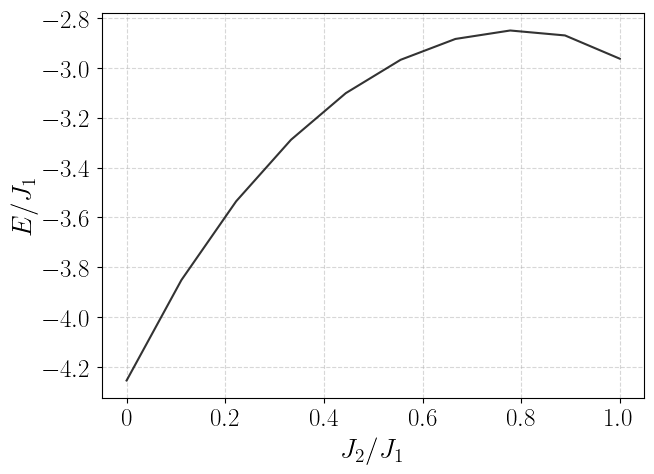

In [114]:
fig, ax = subplots(figsize=(7, 5))

# ax.plot(J_vec, N_GS, alpha=0.8,label="total", color="black",marker="o", markersize=3)
ax.plot(J_vec, N_GS, alpha=0.8,label="total", color="black")
# ax.plot(J_vec, N_BB, alpha=0.8,label="BB", linestyle="--")
# ax.plot(J_vec, N_AB, alpha=0.8,label="AB", linestyle="--")
# ax.plot(J_vec, N_Bog, alpha=0.8,label="Bog", linestyle="--")
# ax.plot(J_vec, N_Normal, alpha=0.8,label="Normal", linestyle="--")

# Set x-ticks to correspond to high-symmetry points
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels([L"$0$", L"$0.2$", L"$0.4$", L"$0.6$", L"$0.8$", L"$1.0$"], fontsize=18)
yticks = collect(range(-4.2, -2.8, length=8))
ax.set_yticks(yticks)
ax.set_yticklabels(["\$" * string(round(y, digits=2)) * "\$" for y in yticks], fontsize=18)

ax.set_xlabel(L"$J_2/J_1$", fontsize=20)
ax.set_ylabel(L"$E/J_1$", fontsize=20)
# ax.set_title("Band Structure Along High-Symmetry Path", fontsize=14)

# ax.legend(loc="upper right", fontsize=10, frameon=false)
ax.grid(true, linestyle="--", alpha=0.5)
# ax.legend()
display(fig)
# save fig
savefig("Trimer Vacuum state energy as function of J.pdf")
close()


### Plot total only

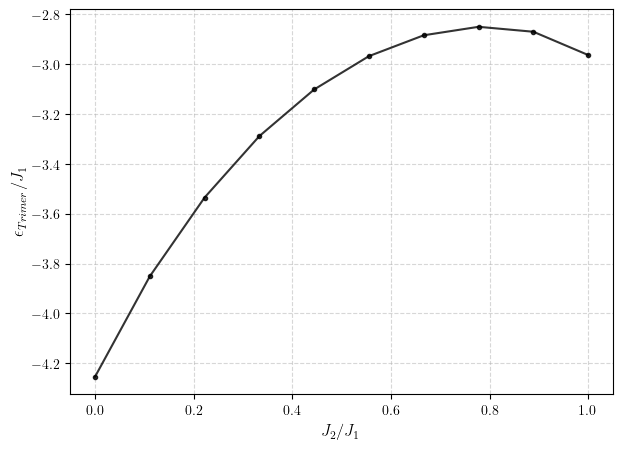

In [61]:
fig, ax = subplots(figsize=(7, 5))

ax.plot(J_vec, N_GS, alpha=0.8,label="total", color="black",marker="o", markersize=3)

# Set x-ticks to correspond to high-symmetry points

ax.set_xlabel(L"$J_2/J_1$", fontsize=12)
ax.set_ylabel(L"$\epsilon_{Trimer}/J_1$", fontsize=12)
# ax.set_title("Band Structure Along High-Symmetry Path", fontsize=14)

# ax.legend(loc="upper right", fontsize=10, frameon=false)
ax.grid(true, linestyle="--", alpha=0.5)
# ax.legend()
display(fig)
# save fig
savefig("Trimer Vacuum state energy as function of J.pdf")


## Alpha beta dependency

In [62]:
A_dict = CreateA_dict()
J = 0.0
N = 100

alpha_values =  range(0.0, 1.0, 10)  # Values for alpha
beta_values = range(0.0, 1.0, 10)   # Values for beta

# Initialize 2D arrays for energies
BB_energy = zeros(Float64, length(beta_values), length(alpha_values))
AB_energy = zeros(Float64, length(beta_values), length(alpha_values))
Bog_energy = zeros(Float64, length(beta_values), length(alpha_values))
GS_energy = zeros(Float64, length(beta_values), length(alpha_values))



for (i, beta) in enumerate(beta_values)
    for (j, alpha) in enumerate(alpha_values)
        try
            Bog_energy[i, j] = BogoliubovVacuumEnergy(A_dict, J, ind_vec = rel_space, N=N, alpha=alpha, beta=beta)

            BB_energy[i, j] = NormalOrderingBB(A_dict, J, ind_vec = rel_space,alpha=alpha)
            AB_energy[i, j] = NormalOrderingAB(A_dict, J, ind_vec = rel_space,beta =beta)
        catch            
            BB_energy[i, j] = NaN
            AB_energy[i, j] = NaN
            Bog_energy[i, j] = NaN
        end
    end
end

Normal_energy = BB_energy .+ AB_energy
GS_energy = BB_energy .+ AB_energy .+ Bog_energy



10×10 Matrix{Float64}:
 -3.0      -2.67056   -2.34823  …   -0.841803   -0.56242   -0.290995
 -3.14794  -3.06819  NaN           NaN         NaN        NaN
 -3.30836  -3.22462   -3.15881     NaN         NaN        NaN
 -3.47774  -3.39276   -3.3226      NaN         NaN        NaN
 -3.65381  -3.56822   -3.49622      -3.38896   NaN        NaN
 -3.835    -3.74907   -3.67609  …   -3.52648    -3.55149   -3.60716
 -4.02025  -3.93411   -3.86052      -3.69183    -3.7039    -3.73557
 -4.20873  -4.12249   -4.04851      -3.86881    -3.87463   -3.89682
 -4.39986  -4.31356   -4.23932      -4.0525     -4.05463   -4.07162
 -4.59319  -4.50686   -4.43244      -4.24069    -4.24039   -4.25408

In [65]:
function plot_energy_scatter(alpha_values, beta_values, energy_array, title::String; color_map = "viridis")
    """
    Plots a 2D scatter plot for the given energy array.
    
    Parameters:
    - alpha_values: Array of alpha values (x-axis).
    - beta_values: Array of beta values (y-axis).
    - energy_array: 2D array of energy values.
    - title: Title of the plot.
    - color_map: Colormap to use for the scatter plot.
    """
    # Flatten the arrays for plotting

    x = repeat(alpha_values, length(beta_values))
    y = repeat(beta_values, inner=length(alpha_values))
    z = vec(energy_array')

    # Filter out NaN values
    valid_indices = .!isnan.(z)  # Apply isnan element-wise
    x = x[valid_indices]
    y = y[valid_indices]
    z = z[valid_indices]

    # Create the scatter plot
    fig, ax = subplots(figsize=(8, 6))
    scatter = ax.scatter(x, y, c=z, cmap=color_map, edgecolor="none")
    ax.set_xlabel(L"\alpha", fontsize=14)
    ax.set_ylabel(L"\beta", fontsize=14)
    ax.set_title(title, fontsize=16)
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label(L"$E/J_1$", fontsize=12)
    ax.grid(true, linestyle="--", alpha=0.5)
    savefig("$title.png", bbox_inches="tight")
end


plot_energy_scatter (generic function with 1 method)

In [66]:
alpha_values = collect(range(0.0, 1.0, 10))  # Values for alpha
beta_values = collect(range(0.0, 1.0, 10))   # Values for beta
plot_energy_scatter(alpha_values, beta_values, BB_energy, "BB Energy")
plot_energy_scatter(alpha_values, beta_values, AB_energy, "AB Energy")
plot_energy_scatter(alpha_values, beta_values, Bog_energy, "Bog Energy")
plot_energy_scatter(alpha_values, beta_values, GS_energy, "GS Energy")
plot_energy_scatter(alpha_values, beta_values, Normal_energy, "Normal Energy")

# Goldstone modes

## Goldstone subspace $J=0$

In [15]:
tol = 1e-7
A_dict = CreateA_dict()

# Define a range of values for J, kx, and ky
J = 0.0
N = 20
kx_values = range(-4*pi/3,4*pi/3,N)
ky_values = range(-4*pi/3,4*pi/3,N)
ind_vec = rel_space
n = length(ind_vec) # number of bands

# Create a 3D array to store the function values
Goldstone_dispersions = [zeros(Float64,length(kx_values), length(ky_values)) for i in 1:n]

# Calculate the function values for each combination of J, kx, and ky
for j in 1:length(kx_values)
    for k in 1:length(ky_values)
        k_vec = [kx_values[j],ky_values[k]]
        H = CreateFullMatrix(A_dict,
            J,
            k_vec,
            ind_vec = ind_vec
        )
        disp_vals = BogoliubovDiagonalization(H)[1]
        for i in 1:n
            Goldstone_dispersions[i][j,k] = disp_vals[i]
        end
    end
end

# Initialize Lowest_Band with the correct dimensions
Lowest_Band = fill(Inf, length(kx_values), length(ky_values))

# Find the minimum value across all bands (i) for each (j, k) point
for j in 1:length(kx_values)
    for k in 1:length(ky_values)
        # Take the minimum across all bands i for the given (j, k)
        Lowest_Band[j, k] = minimum(Goldstone_dispersions[i][j, k] for i in 1:n)
    end
end

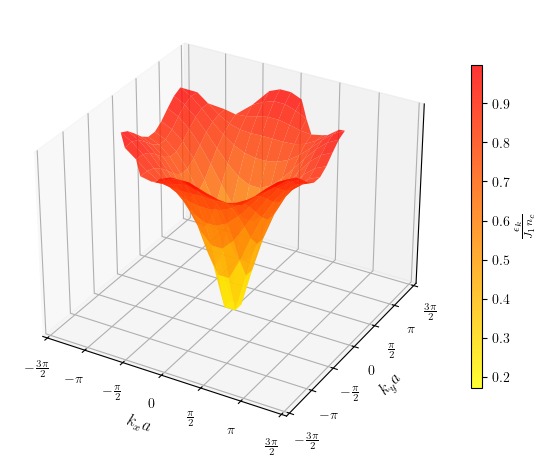

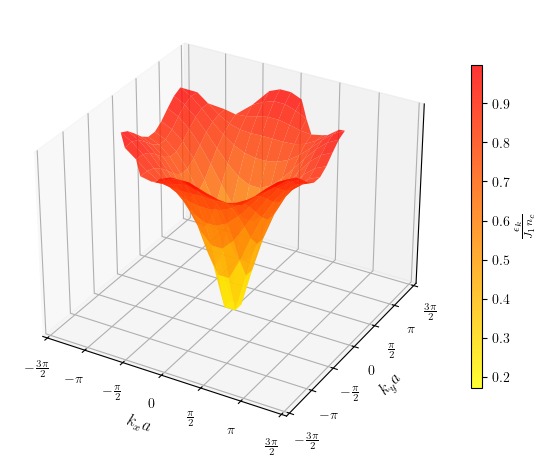

"Dispersion of 20 lowest bands with J=0.0.png"

In [16]:
bands_to_plot = 20
Q_x = repeat(kx_values, 1, length(ky_values))            # Repeat kx along columns
Q_y = permutedims(repeat(ky_values, 1, length(kx_values)), (2, 1))  # Repeat ky along rows

E_min = minimum(minimum(Goldstone_dispersions[i]) for i =1:length(bands_to_plot))
E_max = maximum(maximum(Goldstone_dispersions[i]) for i =1:length(bands_to_plot))

# Generate the mask for points inside the BZ
mask = [is_inside_hexagon(Q_x[i, j], Q_y[i, j]) for i in 1:size(Q_x, 1), j in 1:size(Q_y, 2)]

fig = figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")

# Define color map
mycmap = PyPlot.get_cmap("autumn_r")

# Apply mask to energy arrays E, setting points outside the hexagon to NaN
E_masked = [copy(Goldstone_dispersions[i]) for i in 1:length(bands_to_plot)]
for i in 1:length(bands_to_plot)
    for x in 1:size(mask, 1)
        for y in 1:size(mask, 2)
            if !mask[x, y]
                E_masked[i][x, y] = NaN  # Set points outside BZ to NaN
            end
        end
    end
end
# Plot the surfaces with the masked data
BandStructurs = [ax.plot_surface(Q_x, Q_y, E_masked[i][:,:]', alpha=0.8, linewidth=0, cmap=mycmap, vmin=E_min, vmax=E_max, zorder=5) for i in 1:length(bands_to_plot)]

# Axis labels
ax.set_xlabel(L"$k_x a$", fontsize=12)
ax.set_ylabel(L"$k_y a$", fontsize=12)

# Set x and y ticks with labels
xticks = [-1.5 * π, -π, -π / 2, 0, π / 2, π, 1.5 * π]
xticklabels = [L"$-\frac{3 \pi}{2}$", L"$- \pi$", L"$-\frac{\pi}{2}$", L"$0$", L"$\frac{\pi}{2}$", L"$\pi$", L"$\frac{3 \pi}{2}$"]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_yticks(xticks)
ax.set_yticklabels(xticklabels)
ax.set_zticks([])
# Colorbar

mappable = fig.colorbar(BandStructurs[1], ax=ax, shrink=0.6, aspect=30, extend="neither")

mappable.set_label(L"$\frac{\epsilon_{k}}{J_1 n_c}$", fontsize=12)


display(fig)
# Save plot
J_val = J
name = "Dispersion of $bands_to_plot lowest bands with J=$J_val.png"
# PyPlot.savefig(name)

### Lowest band

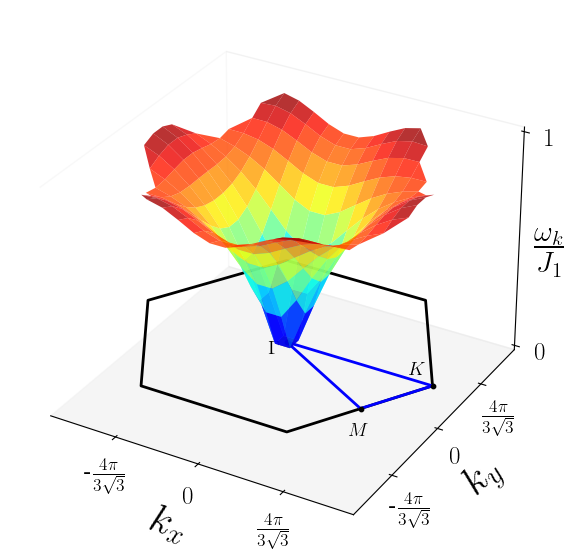

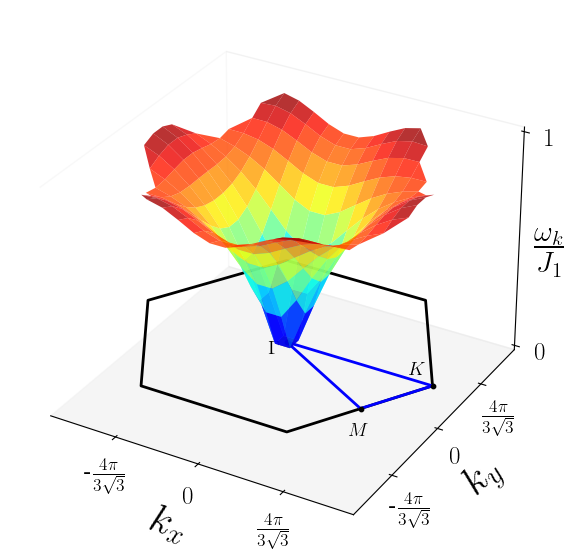

In [17]:

E_min = minimum(Lowest_Band)
E_max = maximum(Lowest_Band)


# Your code for Q_x, Q_y, E_min, E_max, kx_values, and ky_values remains the same

fig = figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

try
    ax.xaxis.pane.fill = false
    ax.yaxis.pane.fill = false
    # ax.zaxis.pane.fill = false
catch
    println("Pane fill method not available, skipping...")
end

mask = [is_inside_hexagon(Q_x[i, j], Q_y[i, j]) for i in 1:size(Q_x, 1), j in 1:size(Q_y, 2)]
Lowerst_E_masked = [copy(Lowest_Band)]
for x in 1:size(mask, 1)
    for y in 1:size(mask, 2)
        if !mask[x, y]
            Lowerst_E_masked[1][x, y] = NaN  # Set points outside BZ to NaN
        end
    end
end

# Your code for mask and Lowerst_E_masked remains the same

mycmap = PyPlot.get_cmap("jet")

# 3D Surface Plot
BandStructurs = ax.plot_surface(Q_x, Q_y, Lowerst_E_masked[1][:,:], alpha=0.8, linewidth=0, cmap=mycmap, vmin=E_min, vmax=E_max, zorder=5)

# 2D Heatmap on the bottom
levels = range(E_min, E_max, length=200)
# ax.contourf(Q_x, Q_y, Lowerst_E_masked[1][:,:], levels=levels, zdir="z", offset=E_min, cmap=mycmap, alpha=1.0, extend="both")

# Axis labels

ax.set_xlabel(L"$k_x$", fontsize=30,labelpad= 10)
ax.set_ylabel(L"$k_y$", fontsize=30,labelpad= 10)

# Set x and y ticks with labels
xticks = [-4/(3*sqrt(3)) * π, 0, 4/(3*sqrt(3)) * π]
xticklabels = [L"-$\frac{4\pi}{3\sqrt{3}}$", L"$0$", L"$\frac{4\pi}{3\sqrt{3}}$"]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=18)
ax.set_yticks(xticks)
ax.set_yticklabels(xticklabels, fontsize=18)

# Set z ticks and labels explicitly
zticks = [0.0, 1.0]
zticklabels = [L"$0$", L"$1$"]

# Ensure grid and limits are set
ax.grid(false)
ax.set_xlim(minimum(kx_values), maximum(kx_values))
ax.set_ylim(minimum(ky_values), maximum(ky_values))
ax.set_zlim(E_min, E_max)

# Set z-ticks and labels
ax.set_zticks(zticks)
ax.set_zticklabels(zticklabels,fontsize=18)
# ax.set_zlabel(L"$\frac{\omega_{k}}{J_1}$", fontsize=20,labelpad=-12)  # Adding labelpad for spacing
# ax.zaxis.label.set_rotation(0)  # Rotate the z-axis label
ax.text2D(1, 0.55, L"$\frac{\omega_{k}}{J_1}$", fontsize=30, transform=ax.transAxes, ha="center", va="center", rotation=0)
# Define hexagon vertices
hex_radius = 4*pi/3#4*pi/3 # Adjust according to your BZ definition
hex_vertices = [[hex_radius * cos(θ), hex_radius * sin(θ)] for θ in range(0, stop=2π, length=7)]

# Extract x and y coordinates of the hexagon
hx = [v[1] for v in hex_vertices]
hy = [v[2] for v in hex_vertices]
    
ax.plot(hx, hy, E_min * ones(length(hx)), "k-", linewidth=2, zorder=1)  # Black outline

# Plot the high symmetry path on the xy-plane

BZ_path = HighSymmetryPath()

# Extract x and y coordinates from the path
path_x = [point[1] for point in BZ_path]
path_y = [point[2] for point in BZ_path]

# Define high-symmetry points
Γ = [0.0, 0.0]
K = [4*pi/3, 0.0]
M = 2*pi/(sqrt(3))*[cos(pi/6),-sin(pi/6)]
ax.plot(path_x, path_y, E_min * ones(length(path_x)), "b", linewidth=2, zorder=2)  # Blue dashed line

# Mark the high-symmetry points
ax.scatter([Γ[1]], [Γ[2]], [E_min], color="black", s=10, label=L"$\Gamma$", zorder=3)
ax.scatter([K[1]], [K[2]], [E_min], color="black", s=10, label=L"$K$", zorder=3)
ax.scatter([M[1]], [M[2]], [E_min], color="black", s=10, label=L"$M$", zorder=3)


# Add labels for the high-symmetry points
ax.text(Γ[1]-0.2, Γ[2], E_min, L"$\Gamma$", color="black", fontsize=14, ha="right", va="top", zorder=4)
ax.text(K[1]-0.7, K[2], E_min, L"$K$", color="black", fontsize=14, ha="left", va="bottom",zorder=4)
ax.text(M[1]+0.7, M[2]-1.0, E_min, L"$M$", color="black", fontsize=14, ha="right", zorder=4)

# Manually add the z-axis label
# label = text2D(0.97, 0.55, L"$\frac{\epsilon_{k}}{J_1}$", fontsize=12, transform=ax.transAxes, ha="center", va="center", rotation=90)

display(fig)
savefig("Lowest band plot with J=$J.pdf",bbox_inches="tight")


## For $J_2 \neq 0$

### Degeneracy

In [63]:
function unique_with_degeneracy(vec::Vector{Float64}; tol=1e-8)
    sorted_vec = vec
    # sorted_vec = sort(vec)
    uniques = Float64[]
    degeneracies = Int[]
    i = 1
    while i <= length(sorted_vec)
        count = 1
        val = sorted_vec[i]
        while i + count <= length(sorted_vec) && abs(sorted_vec[i + count] - val) < tol
            count += 1
        end
        push!(uniques, val)
        push!(degeneracies, count)
        i += count
    end
    return uniques, degeneracies
end

function unique_with_degeneracy_indices_sorted(vec::Vector{Float64}; tol=1e-8)
    uniques = Float64[]
    degeneracies = Int[]
    indices = Vector{Vector{Int}}()
    i = 1
    n = length(vec)
    while i <= n
        count = 1
        val = vec[i]
        idxs = [i]
        while i + count <= n && abs(vec[i + count] - val) < tol
            push!(idxs, i + count)
            count += 1
        end
        push!(uniques, val)
        push!(degeneracies, count)
        push!(indices, idxs)
        i += count
    end
    return uniques, degeneracies, indices
end

function IndInRel(rel_space::Vector{Int}, ind::Int64)
    N = length(rel_space)
    if ind <= N
        return rel_space[ind]
    else
        return rel_space[ind-N]
    end
    return
end


IndInRel (generic function with 1 method)

In [52]:
div(36,2)

18

In [32]:
J = 0.0
k = [0.3,1.4] # Generic k 
M = CreateFullMatrix(A_dict,
     J,
     k,
     ind_vec = rel_space,
     alpha = 1.0,
     beta = 1.0
    )

vals = BogoliubovDiagonalization(M)[1]
deg = unique_with_degeneracy(vals,tol=1e-5)[2] # Degeneracy vector
println("The degeneracy at k=$k:\nFirst: ", deg[1], "\nSecond: ", deg[2])
k_0 = [0.0,0.0] # Generic k 
M_0 = CreateFullMatrix(A_dict,
     J,
     k_0,
     ind_vec = rel_space,
     alpha = 1.0,
     beta = 1.0
    )

vals_0 = BogoliubovDiagonalization(M_0)[1]
deg_0 = unique_with_degeneracy(vals_0,tol=1e-4)[2] # Degeneracy vector

println("The degeneracy at k=$k_0:\nFirst: ", deg_0[1], "\nSecond: ", deg_0[2])

The degeneracy at k=[0.3, 1.4]:
First: 6
Second: 6
The degeneracy at k=[0.0, 0.0]:
First: 12
Second: 32


In [45]:
J = 0.0
k = [0.3,1.4] # Generic k 
M = CreateFullMatrix(A_dict,
     J,
     k,
     ind_vec = rel_space,
     alpha = 1.0,
     beta = 1.0
    )

vals, vecs = BogoliubovDiagonalization(M)
deg_vals, deg = unique_with_degeneracy(vals,tol=1e-4) # Degeneracy vector
deg./2


7-element Vector{Float64}:
 3.0
 3.0
 8.0
 8.0
 3.0
 3.0
 6.0

Eigenstates

In [46]:
deg_vals, deg, indices = unique_with_degeneracy_indices_sorted(vals,tol=1e-4) # Degeneracy vector

([0.6183078925739359, 0.9072933367594443, 2.449489742783174, 2.949935986114819, 3.99666838885662, 4.292317055328884, 4.333333333333331], [6, 6, 16, 16, 6, 6, 12], [[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], [45, 46, 47, 48, 49, 50], [51, 52, 53, 54, 55, 56], [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]])

## High Symmetry Path

In [18]:
J_vec = range(0.0,1.0,10)#[0.0, 0.3, 0.6]
BZ_path = HighSymmetryPath()
ind_vec = rel_space
n = length(ind_vec) # number of bands

# Store the energy values along the path for each band
E_path = [[zeros(Float64, length(BZ_path)) for i in 1:n] for _ in 1:length(J_vec)]
for (j, k_vec) in enumerate(BZ_path)
    for (l, J) in enumerate(J_vec)
        H = CreateFullMatrix(A_dict,
            J,
            k_vec,
            ind_vec = ind_vec
        )
        disp_vals = BogoliubovDiagonalization(H)[1]
        for i in 1:n        
            E_path[l][i][j] = disp_vals[i]
        end
    end
end


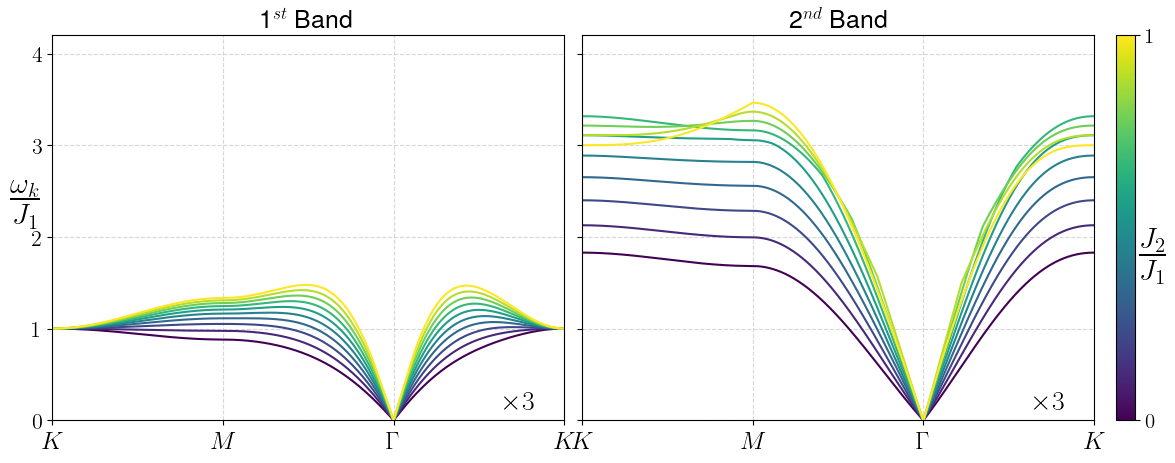

In [20]:
fig, axs = subplots(1, 2, figsize=(14, 5), sharey=true)
fig.subplots_adjust(wspace=0.035)
# Generate a color gradient using the viridis colormap
cmap = get_cmap("viridis")
colors = [cmap(i / (length(J_vec) - 1)) for i in 0:(length(J_vec) - 1)]

# Plot each band's dispersion along the BZ path in separate subplots
for l in 1:length(J_vec)
    color = colors[l]
    axs[1].plot(1:length(BZ_path), E_path[l][1], linewidth=1.5, color=color)

    axs[2].plot(1:length(BZ_path), E_path[l][7], linewidth=1.5, color=color)
end

# Set x-ticks to correspond to high-symmetry points
N_points = length(BZ_path) ÷ 3
xticks = [1, N_points, 2*N_points, 3*N_points]
xticklabels = [L"$K$", L"$M$", L"$\Gamma$", L"$K$"]
yticksvals = [0, 1, 2, 3, 4]
yticklabels = [L"$0$", L"$1$", L"$2$", L"$3$",L"$4$"]
for (i,ax) in enumerate(axs)
    if i == 1
        # ax.set_title("First Band")
        ax.set_title(L"1$^{st}$ Band", fontsize=18)
        ax.set_ylabel(L"$\frac{\omega_{k}}{J_1}$", fontsize=30,rotation=0,labelpad=5)
    else
        ax.set_title(L"2$^{nd}$ Band", fontsize=18)
    end
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, fontsize=18)
    ax.set_yticks(yticksvals)
    ax.set_yticklabels(yticklabels, fontsize=16)
    ax.grid(true, linestyle="--", alpha=0.5)
    ax.text(0.95, 0.02, L"$\times 3$", transform=ax.transAxes, fontsize=20, ha="right", va="bottom")
    ax.set_xlim(1, 3*N_points)
    ax.set_ylim(0.0, 4.2)
end

# Add a colorbar to indicate the different J values
norm1 = PyPlot.matplotlib.colors.Normalize(vmin=minimum(J_vec), vmax=maximum(J_vec))
sm = PyPlot.cm.ScalarMappable(cmap=cmap, norm=norm1)
sm.set_array(J_vec)
cbar = fig.colorbar(sm, ax=axs, orientation="vertical", fraction=0.02, pad=0.02)
cbar.set_label(L"$\frac{J_2}{J_1}$",fontsize=30,labelpad=-2, rotation=0)
cbar_ticks = [0.0, 1.0]
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels([L"$0$",L"$1$"],fontsize=15)

display(fig)
# Save figure
name = "HSP dispersion 0 to 1.pdf"
# savefig(name,bbox_inches="tight")
close()

# Fluctuations

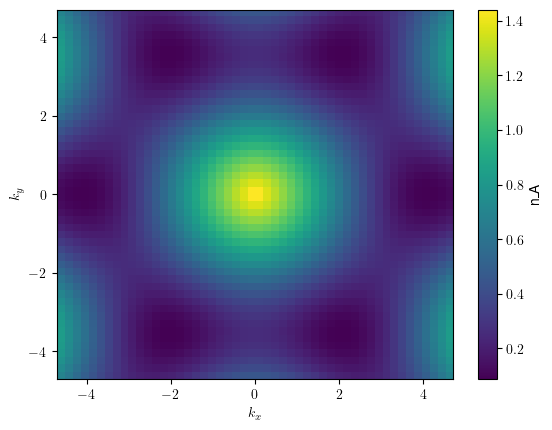

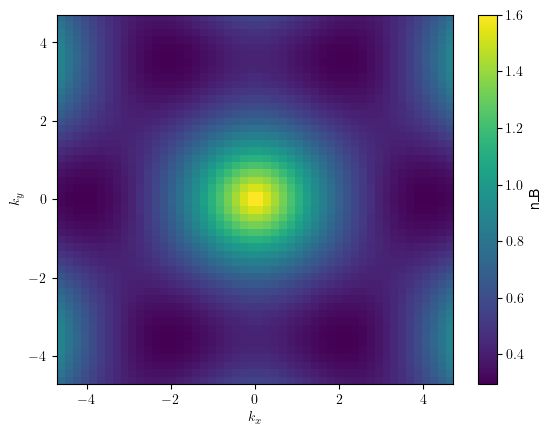

In [160]:
J= 0.0
# Define your grid
N = 50
kx_values = range(-3π/2, 3π/2, N)
ky_values = range(-3π/2, 3π/2, N)

n_A_grid = zeros(Float64, N, N)
n_B_grid = zeros(Float64, N, N)
for (i, kx) in enumerate(kx_values)
    for (j, ky) in enumerate(ky_values)
        k_vec = [kx, ky]
        n_A_grid[i, j], n_B_grid[i, j] = ExpNum_per_k(
            A_dict,
            J,
            k_vec,
            ind_vec = rel_space,
            alpha = 1.0,
            beta = 1.0
        )
    end
end

# Plot n_A
fig, ax = subplots()
cax = ax.imshow(n_A_grid', origin="lower", extent=[minimum(kx_values), maximum(kx_values), minimum(ky_values), maximum(ky_values)], aspect="auto", cmap="viridis")
ax.set_xlabel(L"k_x")
ax.set_ylabel(L"k_y")
# ax.set_title("n_A colormap")
fig.colorbar(cax, ax=ax, label="n_A")
cbar.set_label(L"$\langle a^\dagger a \rangle$",fontsize=20)
display(fig)
savefig("exp_A as function of k for J=$J.pdf")

# Plot n_B
fig, ax = subplots()
cax = ax.imshow(n_B_grid', origin="lower", extent=[minimum(kx_values), maximum(kx_values), minimum(ky_values), maximum(ky_values)], aspect="auto", cmap="viridis")
ax.set_xlabel(L"k_x")
ax.set_ylabel(L"k_y")
# ax.set_title("n_B colormap")
fig.colorbar(cax, ax=ax, label="n_B")
cbar.set_label(L"$\langle b^\dagger b \rangle$",fontsize=20)
display(fig)
savefig("exp_B as function of k for J=$J.pdf",bbox_inches="tight")



In [4]:
N = 30
A_dict = CreateA_dict()
J_vec = range(0.0, 1.0, 20)
alpha_val = 1.0
beta_val = 1.0
exp_A = zeros(Float64, length(J_vec))
exp_B = zeros(Float64, length(J_vec))
for (i, J) in enumerate(J_vec)
    
    exp_A[i], exp_B[i] =VacuumStateFluctuations(
        A_dict,
        J,
        ind_vec = rel_space,
        N = N,
        alpha = alpha_val,
        beta = beta_val
    )
end



## Plot as function of J

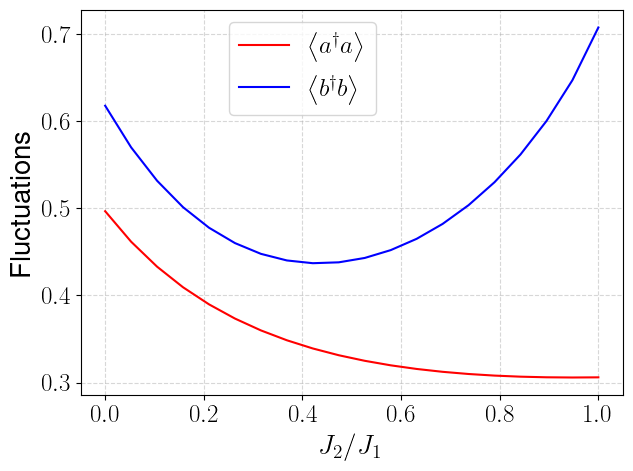

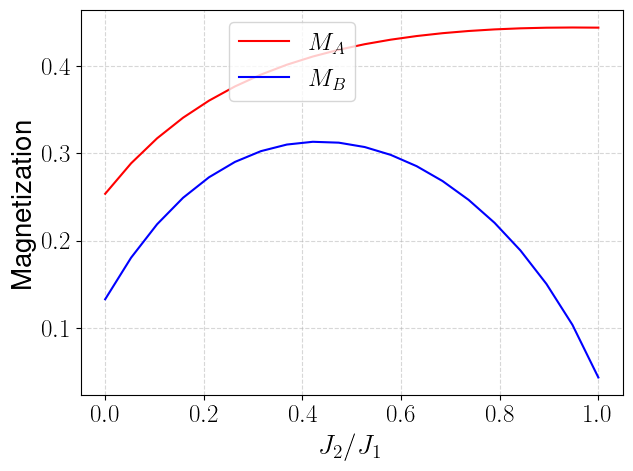

In [ ]:
fig, ax = subplots(figsize=(7, 5))
ax.plot(J_vec, exp_A, label=L"$\left< a^\dagger a \right>$",color="red")
ax.plot(J_vec, exp_B, label=L"$\left< b^\dagger b \right>$",color="blue")
ax.set_xlabel(L"$J_2/J_1$", fontsize=20)
ax.set_ylabel("Fluctuations", fontsize=20)
ax.tick_params(axis="both", labelsize=18)
ax.legend(fontsize=18, loc="upper left", bbox_to_anchor=(0.25, 1.0))
ax.grid(true, linestyle="--", alpha=0.5)
display(fig)
savefig("Fluctuation as function of J.pdf",bbox_inches="tight")
close(fig)



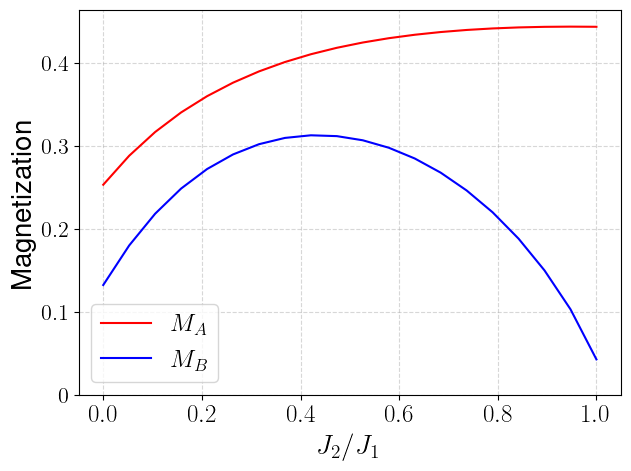

In [9]:
fig, ax = subplots(figsize=(7, 5))
ax.plot(J_vec, [3/4-exp_A[i] for i in 1:length(exp_A)], label=L"$M_A$",color="red")
ax.plot(J_vec, [3/4-exp_B[i] for i in 1:length(exp_B)], label=L"$M_B$",color="blue")
ax.set_xlabel(L"$J_2/J_1$", fontsize=20)
ax.set_ylabel("Magnetization", fontsize=20)
ax.tick_params(axis="both", labelsize=18)
ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
ax.set_yticklabels([L"$0$", L"$0.1$", L"$0.2$", L"$0.3$", L"$0.4$"], fontsize=16)
ax.legend(fontsize=18, loc="lower left")
ax.grid(true, linestyle="--", alpha=0.5)
display(fig)
savefig("Magnetization as function of J.pdf",bbox_inches="tight")
close(fig)


## Plot for alphas and betas

In [76]:
A_dict = CreateA_dict()
J = 0.0
N = 50

alpha_values =  range(0.0, 1.0, 10)  # Values for alpha
beta_values = range(0.0, 1.0, 10)   # Values for beta

# Initialize 2D arrays for energies
exp_A_grid = zeros(Float64, length(beta_values), length(alpha_values))
exp_B_grid = zeros(Float64, length(beta_values), length(alpha_values))



for (i, beta) in enumerate(beta_values)
    for (j, alpha) in enumerate(alpha_values)
        try
            exp_A_grid[i, j], exp_B_grid[i, j] = VacuumStateFluctuations(
                A_dict,
                J,
                ind_vec = rel_space,
                N = N,
                alpha = alpha,
                beta = beta
            )
        catch            
            exp_A_grid[i, j] = NaN
            exp_B_grid[i, j] = NaN
            
        end
    end
end



In [11]:
exp_A_grid

10×10 Matrix{Float64}:
 0.0       0.0         0.0       …    0.0         0.0         0.0
 0.321923  0.428415  NaN            NaN         NaN         NaN
 0.329079  0.373349    0.435745     NaN         NaN         NaN
 0.336928  0.364791    0.399579     NaN         NaN         NaN
 0.344769  0.36517     0.38922        0.6338    NaN         NaN
 0.352285  0.368478    0.386898  …    0.54173     0.597101    0.67112
 0.359342  0.372862    0.387847       0.501439    0.536999    0.58013
 0.365898  0.377582    0.390265       0.480211    0.506241    0.536474
 0.371956  0.382276    0.393344       0.468024    0.488521    0.511716
 0.377539  0.386769    0.396684       0.460723    0.477635    0.496439

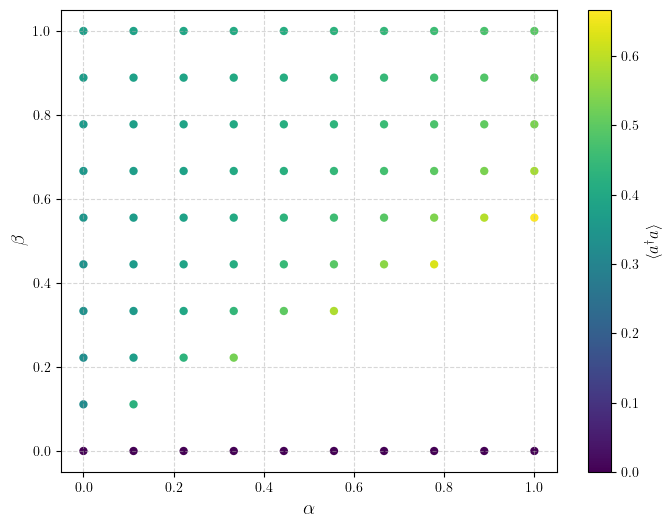

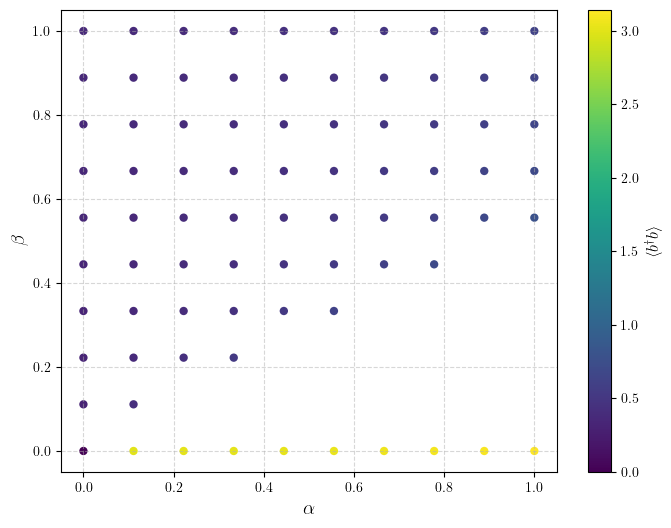

In [125]:
x = repeat(alpha_values, length(beta_values))
y = repeat(beta_values, inner=length(alpha_values))
exp_A_vec = vec(exp_A_grid')
exp_B_vec = vec(exp_B_grid')

# Filter out NaN values
valid_indices = .!isnan.(exp_A_vec)  # Apply isnan element-wise
x = x[valid_indices]
y = y[valid_indices]
z_A = exp_A_vec[valid_indices]
z_B = exp_B_vec[valid_indices]

# Create the scatter plot
fig, ax = subplots(figsize=(8, 6))
scatter = ax.scatter(x, y, c=z_A, cmap="viridis", edgecolor="none")
ax.set_xlabel(L"\alpha", fontsize=14)
ax.set_ylabel(L"\beta", fontsize=14)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label(L"$\langle a^\dagger a \rangle$", fontsize=12)
ax.grid(true, linestyle="--", alpha=0.5)
display(fig)
# savefig("A fluctuation as alpha and beta.pdf",bbox_inches="tight")

fig, ax = subplots(figsize=(8, 6))
scatter = ax.scatter(x, y, c=z_B, cmap="viridis", edgecolor="none")
ax.set_xlabel(L"\alpha", fontsize=14)
ax.set_ylabel(L"\beta", fontsize=14)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label(L"$\langle b^\dagger b \rangle$", fontsize=12)
ax.grid(true, linestyle="--", alpha=0.5)
display(fig)
# savefig("B fluctuation as alpha and beta.pdf",bbox_inches="tight")

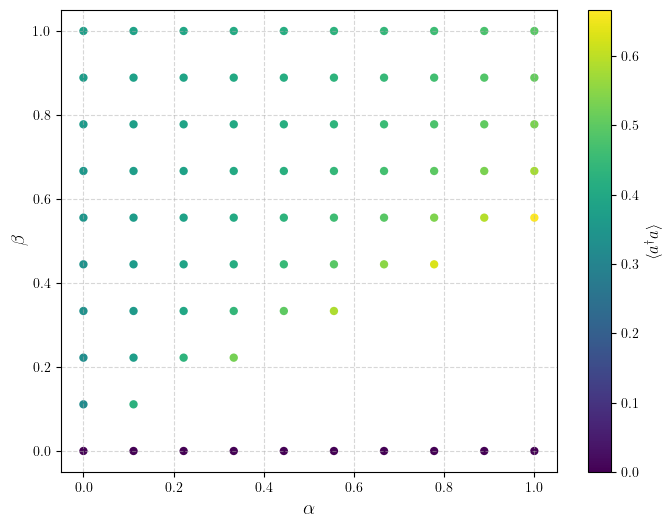

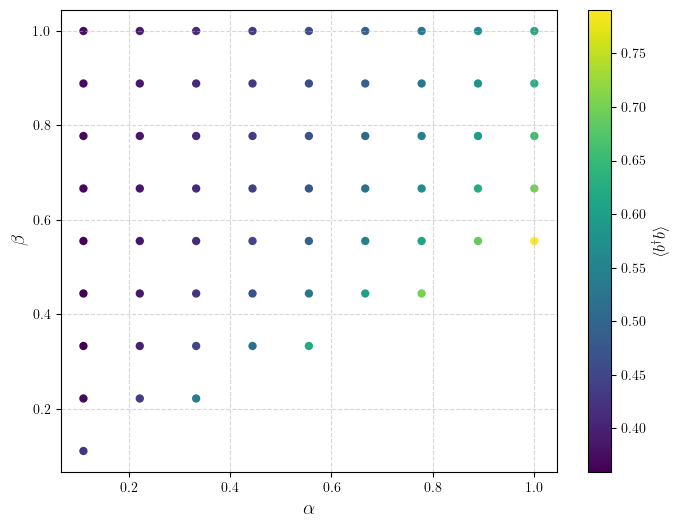

In [159]:
x = repeat(alpha_values, length(beta_values))
y = repeat(beta_values, inner=length(alpha_values))
exp_A_vec = vec(exp_A_grid')
exp_B_vec = vec(exp_B_grid')

# Filter out NaN values
valid_indices = .!isnan.(exp_A_vec)  # Apply isnan element-wise
x = x[valid_indices]
y = y[valid_indices]
z_A = exp_A_vec[valid_indices]
z_B = exp_B_vec[valid_indices]

# Create the scatter plot
fig, ax = subplots(figsize=(8, 6))
scatter = ax.scatter(x, y, c=z_A, cmap="viridis", edgecolor="none")
ax.set_xlabel(L"\alpha", fontsize=14)
ax.set_ylabel(L"\beta", fontsize=14)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label(L"$\langle a^\dagger a \rangle$", fontsize=12)
ax.grid(true, linestyle="--", alpha=0.5)
display(fig)
# savefig("A fluctuation as alpha and beta.pdf",bbox_inches="tight")

alpha_values_sub = alpha_values[2:end]
beta_values_sub = beta_values[2:end]
exp_B_grid_sub = exp_B_grid[2:end, 2:end]

# Prepare data for scatter plot
x_sub = repeat(alpha_values_sub, length(beta_values_sub))
y_sub = repeat(beta_values_sub, inner=length(alpha_values_sub))
z_B_sub = vec(exp_B_grid_sub')

# Filter out NaN values
valid_indices_sub = .!isnan.(z_B_sub)
x_sub = x_sub[valid_indices_sub]
y_sub = y_sub[valid_indices_sub]
z_B_sub = z_B_sub[valid_indices_sub]

fig, ax = subplots(figsize=(8, 6))
scatter = ax.scatter(x_sub, y_sub, c=z_B_sub, cmap="viridis", edgecolor="none")
ax.set_xlabel(L"\alpha", fontsize=14)
ax.set_ylabel(L"\beta", fontsize=14)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label(L"$\langle b^\dagger b \rangle$", fontsize=12)
ax.grid(true, linestyle="--", alpha=0.5)
display(fig)

### For $\alpha, \beta$ grid of [0,0.1]

In [54]:
A_dict = CreateA_dict()
J = 0.0
N = 20

alpha_values =  range(0.0, 0.1, 15)  # Values for alpha
beta_values = range(0.0, 0.1, 15)   # Values for beta

# Initialize 2D arrays for energies
exp_A_grid = zeros(Float64, length(beta_values), length(alpha_values))
exp_B_grid = zeros(Float64, length(beta_values), length(alpha_values))



for (i, beta) in enumerate(beta_values)
    for (j, alpha) in enumerate(alpha_values)
        try
            exp_A_grid[i, j], exp_B_grid[i, j] = VacuumStateFluctuations(
                A_dict,
                J,
                ind_vec = rel_space,
                N = N,
                alpha = alpha,
                beta = beta
            )
        catch            
            exp_A_grid[i, j] = NaN
            exp_B_grid[i, j] = NaN
            
        end
    end
end



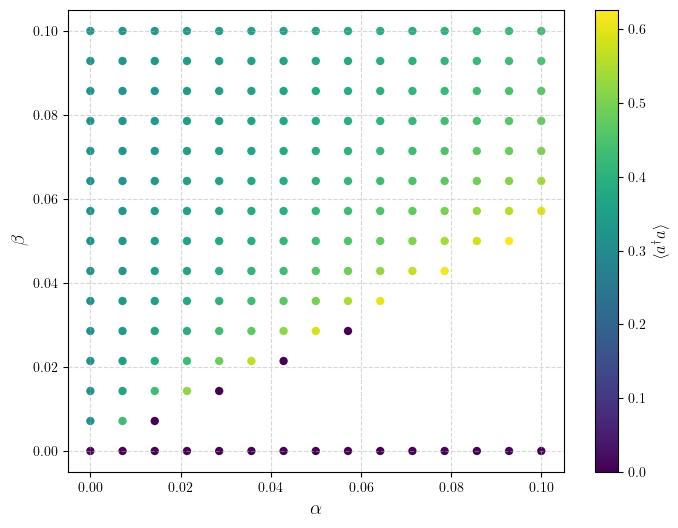

In [63]:

x = repeat(alpha_values, length(beta_values))
y = repeat(beta_values, inner=length(alpha_values))
exp_A_vec = vec(exp_A_grid')
exp_B_vec = vec(exp_B_grid')

# Filter out NaN values
valid_indices = .!isnan.(exp_A_vec)  # Apply isnan element-wise
x = x[valid_indices]
y = y[valid_indices]
z_A = exp_A_vec[valid_indices]
z_B = exp_B_vec[valid_indices]

# Create the scatter plot
fig1, ax1 = subplots(figsize=(8, 6))
scatter = ax1.scatter(x, y, c=z_A, cmap="viridis", edgecolor="none")
ax1.set_xlabel(L"\alpha", fontsize=14)
ax1.set_ylabel(L"\beta", fontsize=14)
cbar1 = fig1.colorbar(scatter, ax=ax1)
cbar1.set_label(L"$\langle a^\dagger a \rangle$", fontsize=12)
ax1.grid(true, linestyle="--", alpha=0.5)
display(fig1)
# savefig("A fluctuation as alpha and beta.pdf",bbox_inches="tight")
close()


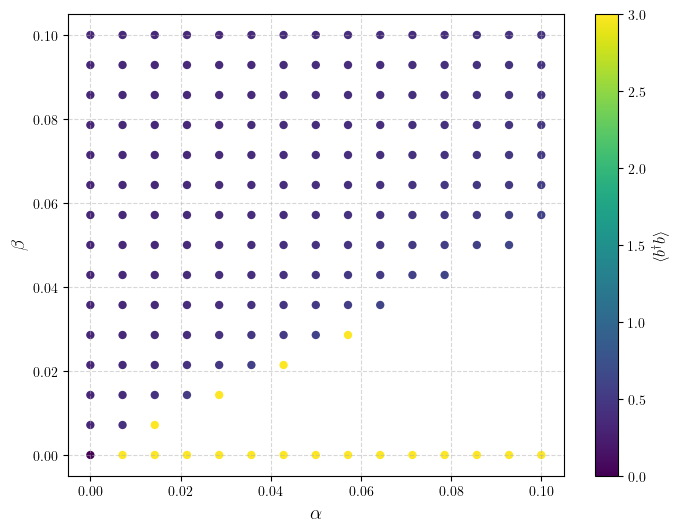

In [62]:
fig2, ax2 = subplots(figsize=(8, 6))
scatter = ax2.scatter(x, y, c=z_B, cmap="viridis", edgecolor="none")
ax2.set_xlabel(L"\alpha", fontsize=14)
ax2.set_ylabel(L"\beta", fontsize=14)
cbar2 = fig2.colorbar(scatter, ax=ax2)
cbar2.set_label(L"$\langle b^\dagger b \rangle$", fontsize=12)
ax2.grid(true, linestyle="--", alpha=0.5)
display(fig2)
# savefig("B fluctuation as alpha and beta.pdf",bbox_inches="tight")
close()

# Phase transition

In [4]:
# Getting rel_space
A_dict = CreateA_dict() 
J = 0.4 # Generic value
k = [3.0,4.5] # Generic value
full_anomalous = CreateAnomalousBB(A_dict, J, k) + CreateAnomalousAB(A_dict, J, k)
full_normal = CreateNormalBB(A_dict, J, k) + CreateNormalAB(A_dict, J, k)
rel_space = find_subspace_D(full_anomalous,full_normal)

34-element Vector{Int64}:
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21
 22
 23
  ⋮
 36
 37
 38
 39
 40
 41
 42
 43
 44
 64
 65
 66

In [5]:
A_dict = CreateA_dict()
J_vec  = range(0.0, 1.0, 20)
N = 100
alpha_val = 1.0
beta_val = 1.0

N_BB = zeros(Float64, length(J_vec))
N_AB = zeros(Float64, length(J_vec))
N_Bog = zeros(Float64, length(J_vec))
N_GS = zeros(Float64, length(J_vec))
N_Normal = zeros(Float64, length(J_vec))

for (i, J) in enumerate(J_vec)
    N_BB[i] = NormalOrderingBB(A_dict, J, ind_vec = rel_space,alpha=alpha_val)
    N_AB[i] = NormalOrderingAB(A_dict, J, ind_vec = rel_space,beta =beta_val)
    N_Bog[i] = BogoliubovVacuumEnergy(A_dict, J, ind_vec = rel_space, N=N, alpha=alpha_val, beta=beta_val)
end
N_Normal = N_BB + N_AB
N_GS = N_BB + N_AB + N_Bog


20-element Vector{Float64}:
 -4.254084477771613
 -4.050941761027914
 -3.870048024242692
 -3.7086841994696584
 -3.5647812987957934
 -3.43673035147156
 -3.323262243475554
 -3.2233688780945187
 -3.1362503263954764
 -3.06127938938711
 -2.997978749082982
 -2.9460082380328956
 -2.9051615661476404
 -2.875373775114724
 -2.85674366689112
 -2.8495815609884474
 -2.8545082930757175
 -2.872681000711644
 -2.906443825430216
 -2.9632937813345634

In [8]:
E_neel = readdlm("D:/Studies/Masters/Reaserch/SU4/FWT/Neel ordered/Code/E_vector.csv", ',')[:, 1] 

20-element Vector{Float64}:
 -4.3598627342146585
 -3.8995954304143905
 -3.679467801694153
 -3.5419218743269503
 -3.4548798747594174
 -3.403495406215302
 -3.3792192031678434
 -3.3765205251765913
 -3.391548142007903
 -3.42147979649654
 -3.46416792986671
 -3.5179303462543436
 -3.5814186745694685
 -3.653531640819754
 -3.7333556274937267
 -3.8201226154554577
 -3.9131796198370465
 -4.011965968695604
 -4.1159960785074485
 -4.224846172586576

In [9]:
typeof(E_neel)

Vector{Float64} (alias for Array{Float64, 1})

In [10]:
first_ind = findfirst(J_vec .> 0.12)
idx = findfirst(N_GS[first_ind:end] .> E_neel[first_ind:end])
idx
phase_ind = first_ind + idx - 1
J_phase = J_vec[phase_ind-1]+ (J_vec[phase_ind] - J_vec[phase_ind-1] )/2

0.2894736842105263

### Just Trimer

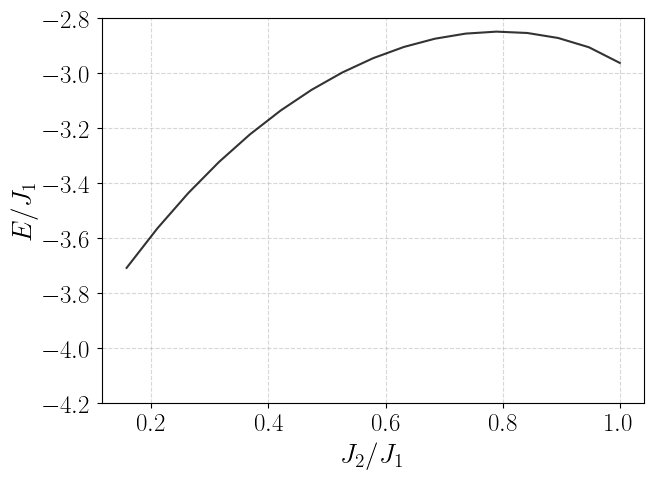

In [11]:
fig, ax = subplots(figsize=(7, 5))

# ax.plot(J_vec, N_GS, alpha=0.8,label="total", color="black",marker="o", markersize=3)
ax.plot(J_vec[first_ind:end], N_GS[first_ind:end], alpha=0.8,label="Trimerized", color="black")
# ax.plot(J_vec[first_ind:end], E_neel[first_ind:end], alpha=0.8,label="Neel",color="green")
# ax.axvline(0.28, color="gray", linestyle="--", linewidth=2)
# i = findfirst(J_vec .>= 0.28)
# if i > 1 && i <= length(J_vec)
#     x0, x1 = J_vec[i-1], J_vec[i]
#     y0, y1 = N_GS[i-1], N_GS[i]
#     N_GS_interp = y0 + (y1 - y0) * (0.28 - x0) / (x1 - x0)
#     # Add an arrow annotation from bottom right
#     ax.annotate(
#         L"$J_2/J_1 \approx 0.28$",
#         xy=(0.28, N_GS_interp),
#         xytext=(0.5, N_GS_interp-0.3),  # <-- bottom right of the point
#         arrowprops=Dict("arrowstyle"=>"->", "color"=>"red", "lw"=>2),
#         fontsize=18,
#         color="red",
#         ha="right"
#     )
# end
# # Set x-ticks to correspond to high-symmetry points
ax.set_xticks([ 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels([L"$0.2$",L"$0.4$", L"$0.6$", L"$0.8$", L"$1.0$"], fontsize=18)
# ax.set_xticks([ 0.2,0.28, 0.4, 0.6, 0.8, 1.0])
# ax.set_xticklabels([L"$0.2$", L"$0.28$" , L"$0.4$", L"$0.6$", L"$0.8$", L"$1.0$"], fontsize=18)
yticks = collect(range(-4.2, -2.8, length=8))
ax.set_yticks(yticks)
ax.set_yticklabels(["\$" * string(round(y, digits=2)) * "\$" for y in yticks], fontsize=18)

ax.set_xlabel(L"$J_2/J_1$", fontsize=20)
ax.set_ylabel(L"$E/J_1$", fontsize=20)
# ax.set_title("Band Structure Along High-Symmetry Path", fontsize=14)

# ax.legend(loc="upper right", fontsize=10, frameon=false)
ax.grid(true, linestyle="--", alpha=0.5)
# ax.legend(fontsize=18, loc="upper left")
display(fig)

# save fig
savefig("TrimerVacuumEnergy.pdf",bbox_inches="tight")
close()


Just Neel

In [ ]:
fig, ax = subplots(figsize=(7, 5))

# ax.plot(J_vec, N_GS, alpha=0.8,label="total", color="black",marker="o", markersize=3)
ax.plot(J_vec[first_ind:end], E_neel[first_ind:end], alpha=0.8,label="Trimerized", color="black")
# ax.plot(J_vec[first_ind:end], E_neel[first_ind:end], alpha=0.8,label="Neel",color="green")
# ax.axvline(0.28, color="gray", linestyle="--", linewidth=2)
# i = findfirst(J_vec .>= 0.28)
# if i > 1 && i <= length(J_vec)
#     x0, x1 = J_vec[i-1], J_vec[i]
#     y0, y1 = N_GS[i-1], N_GS[i]
#     N_GS_interp = y0 + (y1 - y0) * (0.28 - x0) / (x1 - x0)
#     # Add an arrow annotation from bottom right
#     ax.annotate(
#         L"$J_2/J_1 \approx 0.28$",
#         xy=(0.28, N_GS_interp),
#         xytext=(0.5, N_GS_interp-0.3),  # <-- bottom right of the point
#         arrowprops=Dict("arrowstyle"=>"->", "color"=>"red", "lw"=>2),
#         fontsize=18,
#         color="red",
#         ha="right"
#     )
# end
# # Set x-ticks to correspond to high-symmetry points
ax.set_xticks([ 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels([L"$0.2$",L"$0.4$", L"$0.6$", L"$0.8$", L"$1.0$"], fontsize=18)
# ax.set_xticks([ 0.2,0.28, 0.4, 0.6, 0.8, 1.0])
# ax.set_xticklabels([L"$0.2$", L"$0.28$" , L"$0.4$", L"$0.6$", L"$0.8$", L"$1.0$"], fontsize=18)
yticks = collect(range(-4.2, -2.8, length=8))
ax.set_yticks(yticks)
ax.set_yticklabels(["\$" * string(round(y, digits=2)) * "\$" for y in yticks], fontsize=18)

ax.set_xlabel(L"$J_2/J_1$", fontsize=20)
ax.set_ylabel(L"$E/J_1$", fontsize=20)
# ax.set_title("Band Structure Along High-Symmetry Path", fontsize=14)

# ax.legend(loc="upper right", fontsize=10, frameon=false)
ax.grid(true, linestyle="--", alpha=0.5)
# ax.legend(fontsize=18, loc="upper left")
display(fig)

# save fig
savefig("NeelVacuumEnergy.pdf",bbox_inches="tight")
close()


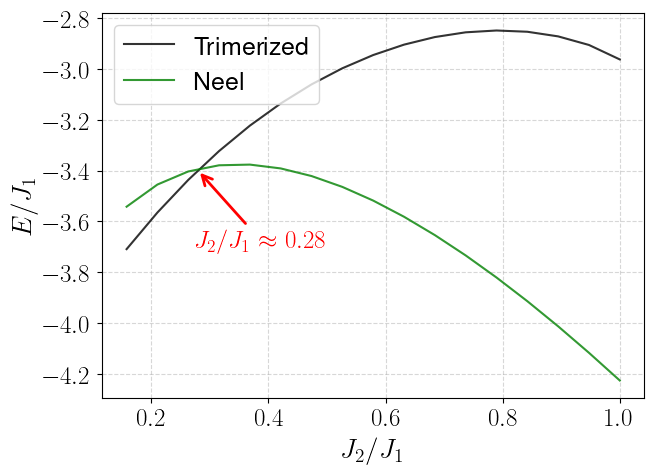

In [16]:
fig, ax = subplots(figsize=(7, 5))

# ax.plot(J_vec, N_GS, alpha=0.8,label="total", color="black",marker="o", markersize=3)
ax.plot(J_vec[first_ind:end], N_GS[first_ind:end], alpha=0.8,label="Trimerized", color="black")
ax.plot(J_vec[first_ind:end], E_neel[first_ind:end], alpha=0.8,label="Neel",color="green")
# ax.axvline(0.28, color="gray", linestyle="--", linewidth=2)
i = findfirst(J_vec .>= 0.28)
if i > 1 && i <= length(J_vec)
    x0, x1 = J_vec[i-1], J_vec[i]
    y0, y1 = N_GS[i-1], N_GS[i]
    N_GS_interp = y0 + (y1 - y0) * (0.28 - x0) / (x1 - x0)
    # Add an arrow annotation from bottom right
    ax.annotate(
        L"$J_2/J_1 \approx 0.28$",
        xy=(0.28, N_GS_interp),
        xytext=(0.5, N_GS_interp-0.3),  # <-- bottom right of the point
        arrowprops=Dict("arrowstyle"=>"->", "color"=>"red", "lw"=>2),
        fontsize=18,
        color="red",
        ha="right"
    )
end
# Set x-ticks to correspond to high-symmetry points
ax.set_xticks([ 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels([L"$0.2$",L"$0.4$", L"$0.6$", L"$0.8$", L"$1.0$"], fontsize=18)
# ax.set_xticks([ 0.2,0.28, 0.4, 0.6, 0.8, 1.0])
# ax.set_xticklabels([L"$0.2$", L"$0.28$" , L"$0.4$", L"$0.6$", L"$0.8$", L"$1.0$"], fontsize=18)
yticks = collect(range(-4.2, -2.8, length=8))
ax.set_yticks(yticks)
ax.set_yticklabels(["\$" * string(round(y, digits=2)) * "\$" for y in yticks], fontsize=18)

ax.set_xlabel(L"$J_2/J_1$", fontsize=20)
ax.set_ylabel(L"$E/J_1$", fontsize=20)
# ax.set_title("Band Structure Along High-Symmetry Path", fontsize=14)

# ax.legend(loc="upper right", fontsize=10, frameon=false)
ax.grid(true, linestyle="--", alpha=0.5)
ax.legend(fontsize=18, loc="upper left")
display(fig)
# save fig
savefig("PhaseTransitionTruncated.pdf",bbox_inches="tight")
close()


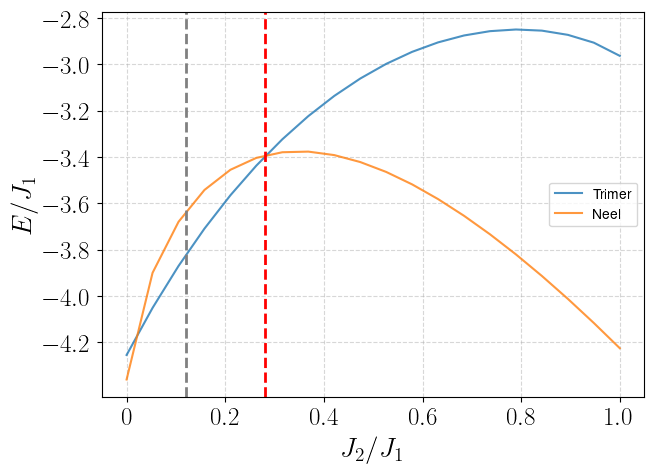

In [181]:
fig, ax = subplots(figsize=(7, 5))

# ax.plot(J_vec, N_GS, alpha=0.8,label="total", color="black",marker="o", markersize=3)
ax.plot(J_vec, N_GS, alpha=0.8,label="Trimer")
ax.plot(J_vec, E_neel, alpha=0.8,label="Neel")
ax.axvline(0.12, color="gray", linestyle="--", linewidth=2)
# ax.axvline(J_vec[phase_ind-1], color="red", linestyle="--", linewidth=2)
ax.axvline(0.28, color="red", linestyle="--", linewidth=2)
# Set x-ticks to correspond to high-symmetry points
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels([L"$0$", L"$0.2$", L"$0.4$", L"$0.6$", L"$0.8$", L"$1.0$"], fontsize=18)
yticks = collect(range(-4.2, -2.8, length=8))
ax.set_yticks(yticks)
ax.set_yticklabels(["\$" * string(round(y, digits=2)) * "\$" for y in yticks], fontsize=18)

ax.set_xlabel(L"$J_2/J_1$", fontsize=20)
ax.set_ylabel(L"$E/J_1$", fontsize=20)
# ax.set_title("Band Structure Along High-Symmetry Path", fontsize=14)

# ax.legend(loc="upper right", fontsize=10, frameon=false)
ax.grid(true, linestyle="--", alpha=0.5)
ax.legend()
display(fig)
# save fig
# savefig("PhaseTransition.pdf",bbox_inches="tight")
close()


# Additional checks

## Degeneracies

In [3]:
function unique_with_degeneracy(vec::Vector{Float64}; tol=1e-8)
    sorted_vec = vec
    # sorted_vec = sort(vec)
    uniques = Float64[]
    degeneracies = Int[]
    i = 1
    while i <= length(sorted_vec)
        count = 1
        val = sorted_vec[i]
        while i + count <= length(sorted_vec) && abs(sorted_vec[i + count] - val) < tol
            count += 1
        end
        push!(uniques, val)
        push!(degeneracies, count)
        i += count
    end
    return uniques, degeneracies
end

function unique_with_degeneracy_indices_sorted(vec::Vector{Float64}; tol=1e-8)
    uniques = Float64[]
    degeneracies = Int[]
    indices = Vector{Vector{Int}}()
    i = 1
    n = length(vec)
    while i <= n
        count = 1
        val = vec[i]
        idxs = [i]
        while i + count <= n && abs(vec[i + count] - val) < tol
            push!(idxs, i + count)
            count += 1
        end
        push!(uniques, val)
        push!(degeneracies, count)
        push!(indices, idxs)
        i += count
    end
    return uniques, degeneracies, indices
end

function IndInRel(rel_space::Vector{Int}, ind::Int64)
    N = length(rel_space)
    if ind <= N
        return rel_space[ind]
    else
        return rel_space[ind-N]
    end
    return
end


IndInRel (generic function with 1 method)

In [15]:
J = 0.0
k = [0.3,1.4] # Generic k 
M = CreateFullMatrix(A_dict,
     J,
     k,
     ind_vec = rel_space,
     alpha = 1.0,
     beta = 1.0
    )

vals = BogoliubovDiagonalization(M)[1]
deg = unique_with_degeneracy(vals,tol=1e-5)[2] # Degeneracy vector
println("The degeneracy at k=$k:\nFirst: ", deg[1], "\nSecond: ", deg[2])
k_0 = [0.0,0.0] # Generic k 
M_0 = CreateFullMatrix(A_dict,
     J,
     k_0,
     ind_vec = rel_space,
     alpha = 1.0,
     beta = 1.0
    )

vals_0 = BogoliubovDiagonalization(M_0)[1]
deg_0 = unique_with_degeneracy(vals_0,tol=1e-4)[2] # Degeneracy vector

println("The degeneracy at k=$k_0:\nFirst: ", deg_0[1], "\nSecond: ", deg_0[2])

The degeneracy at k=[0.3, 1.4]:
First: 6
Second: 6
The degeneracy at k=[0.0, 0.0]:
First: 12
Second: 32


In [16]:
J = 0.0
k = [0.3,1.4] # Generic k 
M = CreateFullMatrix(A_dict,
     J,
     k,
     ind_vec = rel_space,
     alpha = 1.0,
     beta = 1.0
    )

vals, vecs = BogoliubovDiagonalization(M)
deg_vals, deg = unique_with_degeneracy(vals,tol=1e-4) # Degeneracy vector
deg./2


7-element Vector{Float64}:
 3.0
 3.0
 8.0
 8.0
 3.0
 3.0
 6.0

Printing the vectors of the 6fold degenerate subspace at the M point.

In [17]:
deg_vals, deg, indices = unique_with_degeneracy_indices_sorted(vals,tol=1e-4) # Degeneracy vector
sixfold_deg = indices[7]
eigenvecs = sparse(vecs)
eigenvecs = threshold_sparse!(eigenvecs,1e-4)
ind = 4 # Index of a specific state within the 6fold degenerate states
a = SparseMatrixCSC(eigenvecs[:,sixfold_deg[ind]])
println("The indices of the $ind th of the sixfold degenerate state at k=$k: \n")
nz_indices, _ = findnz(a)
println([IndInRel(rel_space,nz_indices[i]) for i in 1:length(nz_indices)])
println()

println("The eigenvector corresponding to one of the sixfold degenerate state at k=$k: \n")
print_nonzero_entries(a)


The indices of the 4 th of the sixfold degenerate state at k=[0.3, 1.4]: 

[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]

The eigenvector corresponding to one of the sixfold degenerate state at k=[0.3, 1.4]: 

[54, 1] 0.06398363036564347 - 0.18452933186507223im
[55, 1] 0.0639836303656438 - 0.18452933186507275im
[56, 1] 0.024401107589683533 - 0.06051103401556082im
[57, 1] 0.02440110758968378 - 0.06051103401556089im
[58, 1] 0.2421454983822039 + 0.11663661204340872im
[59, 1] 0.24214549838220412 + 0.11663661204341011im
[60, 1] 0.149737335817482 + 0.07704437634551117im
[61, 1] 0.14973733581749082 + 0.07704437634551406im
[62, 1] 0.5974870427048722 + 0.0im
[63, 1] 0.5974870427048699 + 1.6653345369377348e-16im
[64, 1] -0.003339396644453899 + 0.0006755348599317608im
[65, 1] -0.003339396644462183 + 0.0006755348599345513im


## At M point 

### Single value of J

In [42]:
# J_vec = range(0.0,1.0,30)#[0.0, 0.3, 0.6]
J = 1.0
M = 2*pi/(sqrt(3))*[cos(pi/6),-sin(pi/6)] # M point
ind_vec = rel_space
n = 33 # length(ind_vec) # number of bands

# Store the energy values along the path for each band
E_path_full_disp = zeros(Float64, 2*n)
H = CreateFullMatrix(A_dict,
    J,
    M,
    ind_vec = ind_vec
)
disp_vals = BogoliubovDiagonalization(H)[1]
for i in 1:n        
    E_path_full_disp[i] = disp_vals[2*i-1]
end



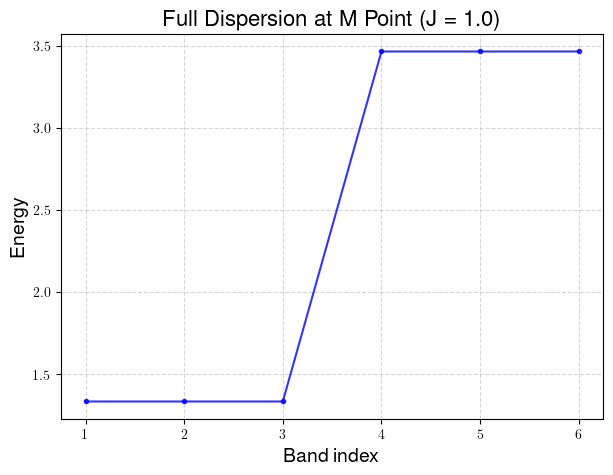

In [43]:
N = 6 # Number of bands to plot
fig, ax = subplots(figsize=(7, 5))

x_axis = 1:N
y_axis = E_path_full_disp[1:N]
ax.plot(x_axis, y_axis, marker="o", linestyle="-", color="blue",markersize=3, alpha=0.8)

# ax.plot(1:length(E_path_full_disp), E_path_full_disp, marker="o", linestyle="-", color="blue",markersize=3, alpha=0.8)
ax.set_xlabel("Band index", fontsize=14)

if N==66
    xticks = 0:6:66
    ax.set_xticks(xticks)
    ax.set_xticklabels([string(x) for x in xticks], fontsize=12)
end

ax.set_ylabel("Energy", fontsize=14)
ax.set_title("Full Dispersion at M Point (J = $J)", fontsize=16)
ax.grid(true, linestyle="--", alpha=0.5)
display(fig)
# Optionally save the figure
# savefig("E_path_full_disp_vs_index.pdf", bbox_inches="tight")
close(fig)

### Multiple value of J

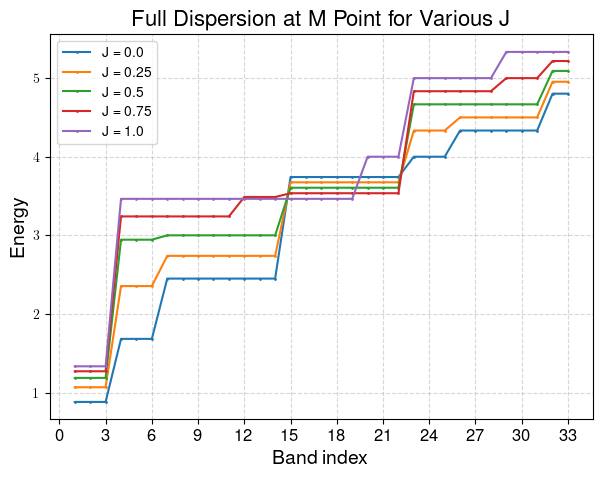

In [47]:
J_vec = range(0.0,1.0,5)
fig, ax = subplots(figsize=(7, 5))

for J in J_vec
    H = CreateFullMatrix(A_dict, J, M, ind_vec = ind_vec)
    disp_vals = BogoliubovDiagonalization(H)[1]
    eigenvals = [disp_vals[2*i-1] for i in 1:n]
    ax.plot(1:length(eigenvals), eigenvals, marker="o", linestyle="-", label="J = $(round(J, digits=2))",markersize=1)
end

xticks = 0:3:33
ax.set_xticks(xticks)
ax.set_xticklabels([string(x) for x in xticks], fontsize=12)

ax.set_xlabel("Band index", fontsize=14)
ax.set_ylabel("Energy", fontsize=14)
ax.set_title("Full Dispersion at M Point for Various J", fontsize=16)
ax.grid(true, linestyle="--", alpha=0.5)
ax.legend(fontsize=10)
display(fig)
# Optionally save the figure
savefig("Full dispersion at M point for various J.pdf", bbox_inches="tight")
close(fig)

## Lowest band at K point

In [21]:
K = [4*pi/3, 0.0]

J_vec = range(2.3,2.5,30)#[0.0, 0.3, 0.6]
ind_vec = rel_space
n = length(ind_vec) # number of bands

# Store the energy values along the path for each band
E_disp_K = zeros(Float64, length(J_vec))
for (j, J) in enumerate(J_vec)
    # Create the full matrix for the current J and K
    try
        H = CreateFullMatrix(A_dict,
            J,
            K,
            ind_vec = ind_vec
        )
        disp_vals = BogoliubovDiagonalization(H)[1]
        E_disp_K[j] = disp_vals[1]  # Store the first band energy
    catch e
        E_disp_K[j] = NaN  # Assign NaN if an error occurs
    end
end

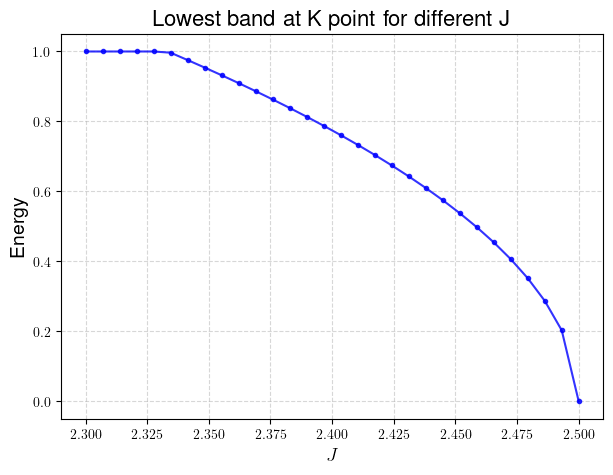

In [22]:

fig, ax = subplots(figsize=(7, 5))
ax.plot(J_vec, E_disp_K, marker="o", linestyle="-", color="blue",markersize=3, alpha=0.8)
ax.set_xlabel(L"$J$", fontsize=14)
ax.set_ylabel("Energy", fontsize=14)
ax.set_title("Lowest band at K point for different J", fontsize=16)
ax.grid(true, linestyle="--", alpha=0.5)
display(fig)
# Optionally save the figure
# savefig("E_path_full_disp_vs_index.pdf", bbox_inches="tight")
close(fig)


## Fluctuations

In [4]:
A_dict = CreateA_dict()
J = 0.0
N = 30

alpha_val = 1.0
beta_values = range(0.4, 1.0, 10)   # Values for beta

# Initialize 2D arrays for energies
exp_A_vec = zeros(Float64, length(beta_values))
exp_B_vec = zeros(Float64, length(beta_values))



for (j, beta) in enumerate(beta_values)
    try
        exp_A_vec[j], exp_B_vec[j] = VacuumStateFluctuations(
            A_dict,
            J,
            ind_vec = rel_space,
            N = N,
            alpha = alpha_val,
            beta = beta
        )
    catch            
        exp_A_vec[j] = NaN
        exp_B_vec[j] = NaN
        
    end
end



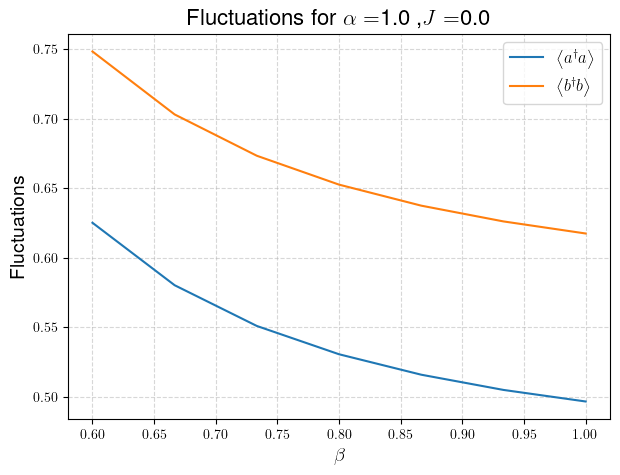

In [5]:
fig, ax = subplots(figsize=(7, 5))
ax.plot(beta_values, exp_A_vec, label=L"$\left< a^\dagger a \right>$")
ax.plot(beta_values, exp_B_vec, label=L"$\left< b^\dagger b \right>$")
ax.set_xlabel(L"$\beta$", fontsize=14)
ax.set_ylabel("Fluctuations", fontsize=14)
ax.set_title("Fluctuations for "*L"$\alpha =$"*"$alpha_val ,"*L"$J =$"*"$J", fontsize=16)
ax.grid(true, linestyle="--", alpha=0.5)
ax.legend(fontsize=12, loc="upper right")
display(fig)

# Optionally save the figure
# savefig("E_path_full_disp_vs_index.pdf", bbox_inches="tight")
close(fig)


In [7]:
exp_B_vec

10-element Vector{Float64}:
 NaN
 NaN
 NaN
   0.7484088029816939
   0.7030832276516138
   0.6733410628734441
   0.6525557234135353
   0.637420397013255
   0.6260728503948243
   0.617378784363687